In [2]:
from src.Time_Series_First_Model import *
from src import Prep
from src.Time_Series_Stats_Step import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload

In [4]:
%reload_ext autoreload

In [9]:
%autoreload

In [10]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
3 of 11 |    Concatenating datasets together
4 of 11 |    Cleaning up column names
5 of 11 |    Sorting values by installation_date
6 of 11 |    Assigning installation_date as index
7 of 11 |    Refining to only RES customer_segment
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------------------------------------------------------------


In [11]:
df

,system_size,total_installed_price,customer_segment,date,adj_installed_price,cost_per_watt
installation_date,,,,,,
1998-01-30,4.251500,17439.0,RES,1998-01-30,27838.84,6.55
1998-04-08,2.331600,30941.0,RES,1998-04-08,49119.27,21.07
1998-04-30,4.181100,17439.0,RES,1998-04-30,27684.65,6.62
1998-07-07,2.282400,24500.0,RES,1998-07-07,38727.26,16.97
1998-07-10,3.113265,17439.0,RES,1998-07-10,27565.91,8.85
...,...,...,...,...,...,...
2018-12-31,5.703500,22030.5,RES,2018-12-31,22621.35,3.97
2018-12-31,3.300000,24750.0,RES,2018-12-31,25413.79,7.70
2018-12-31,4.200000,29400.0,RES,2018-12-31,30188.50,7.19


In [ ]:
yw = resample_df(df)
lagg_cost = create_lag(yw)

In [14]:
syw = shortened_timeline(df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:41:09   Log-Likelihood:                -320.64
No. Observations:                 885   AIC:                             649.3
Df Residuals:                     881   BIC:                             668.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0235      0.035      0.676      0.4

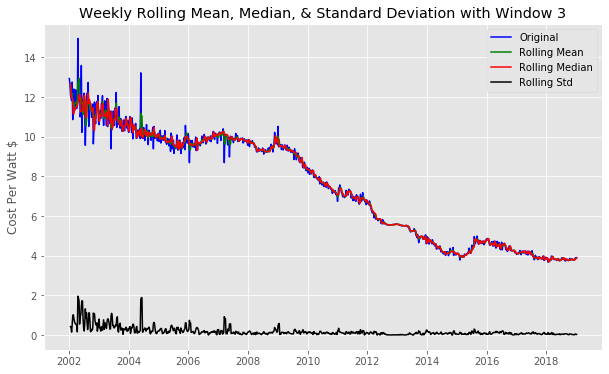

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [16]:
rolling_plot(syw)
plt.show()
test_stationarity(syw)